# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import sys
sys.path.insert(0, "../source/modules")
import viz

import warnings
warnings.filterwarnings("ignore")

# Import Dataset

In [2]:
df = pd.read_csv('../data/raw_data.csv')
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


# Data Shape

In [3]:
print("data has {} rows and {} columns".format(df.shape[0], df.shape[1]))

data has 10000 rows and 14 columns


# Detect Missing Values

In [4]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

The dataset has not contains any missing values.

# Data Types

In [5]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

# Feature Analysis

In [6]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
numerical_df = numerical_df.drop(['UDI'], axis=1) # because it is an ID
categorical_df = df.select_dtypes(include=['object'])

### Numerical Distribution

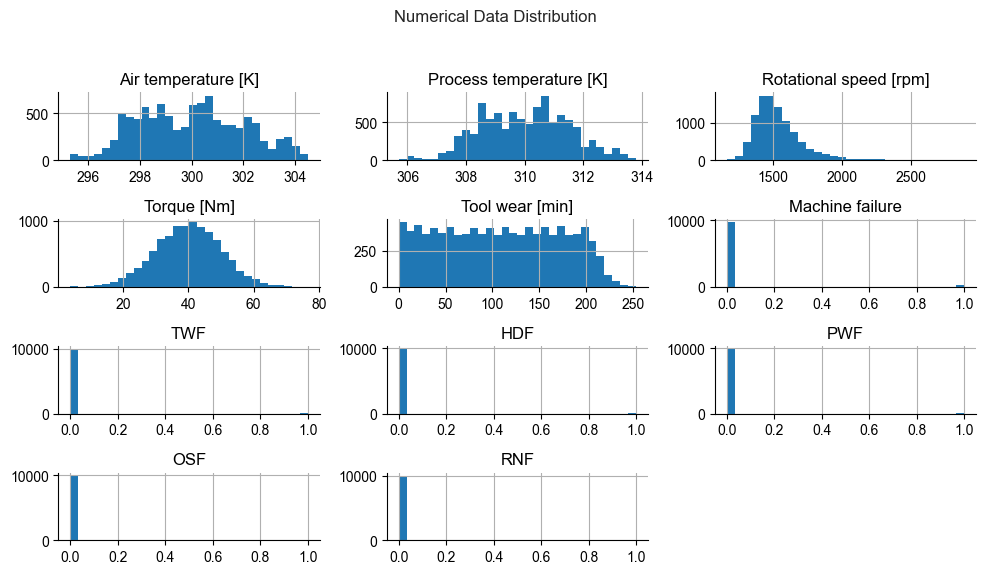

In [7]:
# facet & geometric object
ax = df[numerical_df.columns].hist(figsize=(10, 6), bins=30)

# aesthetics
sns.set_style("ticks")
sns.despine()
plt.suptitle("Numerical Data Distribution")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Detect Outliers

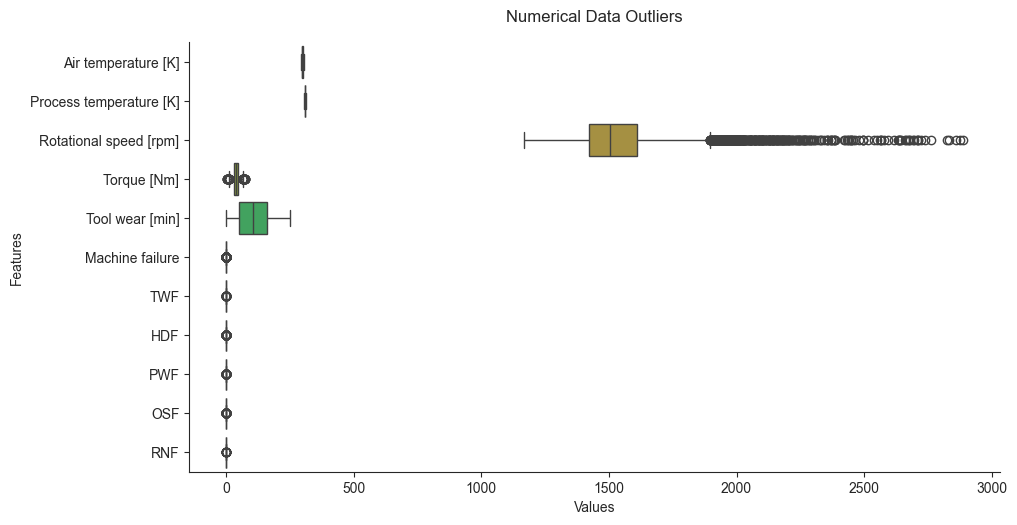

In [8]:
# facet
plt.figure(figsize=(10, 5))

# geometric object
sns.boxplot(data=df[numerical_df.columns], orient="h")

# aesthetics
sns.set_style("whitegrid")
sns.despine()
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Numerical Data Outliers", pad=15)
plt.ylabel("Features")
plt.xlabel("Values")
plt.xticks(rotation=360)
plt.show()

### Summary Statistics

In [9]:
df[numerical_df.columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Air temperature [K],10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process temperature [K],10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational speed [rpm],10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque [Nm],10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool wear [min],10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


### Numerical Correlations

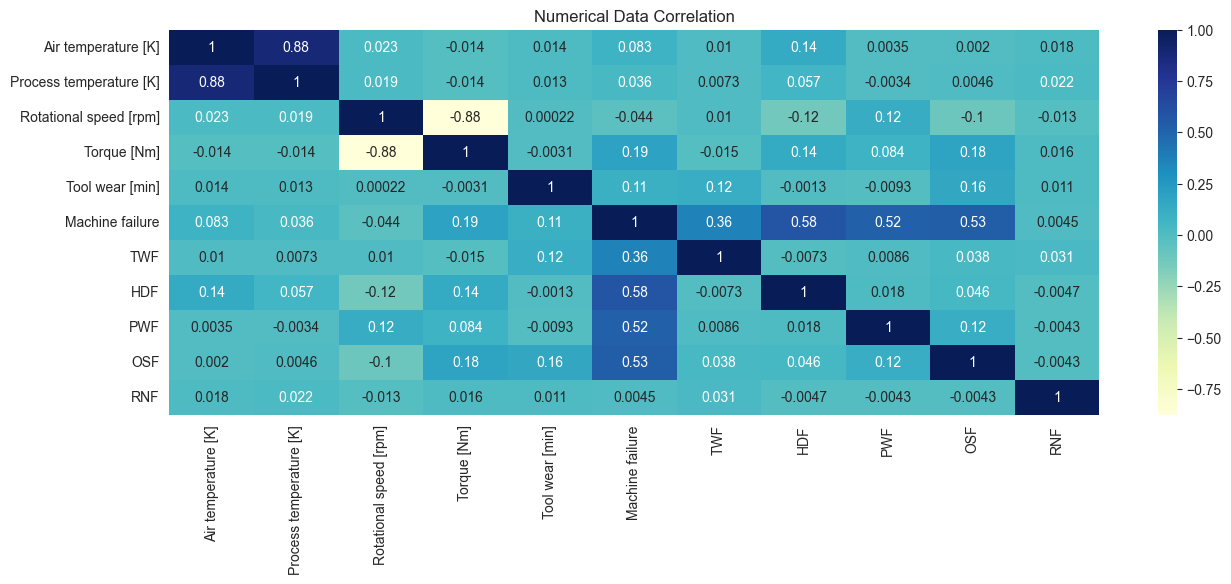

In [10]:
plt.figure(figsize=(15, 5))
sns.heatmap(df[numerical_df.columns].corr(), annot=True, cmap="YlGnBu")
plt.title("Numerical Data Correlation")
plt.show()

# Categorical Value Proportion

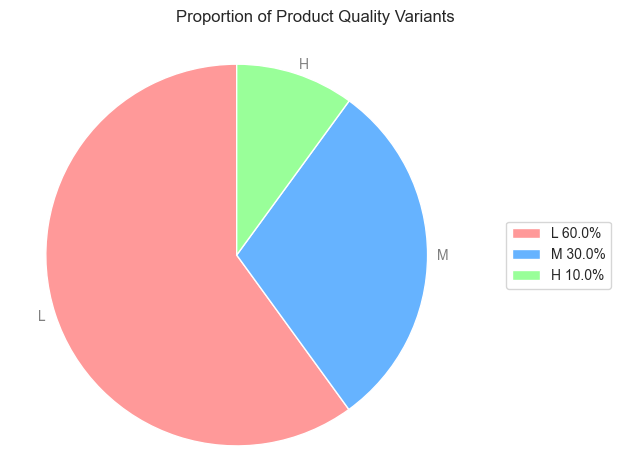

In [11]:
viz.plot_pie_chart(categorical_df['Type'].value_counts().reset_index(), 'Type', 'count', "Proportion of Product Quality Variants")

# Target Variable Proportion

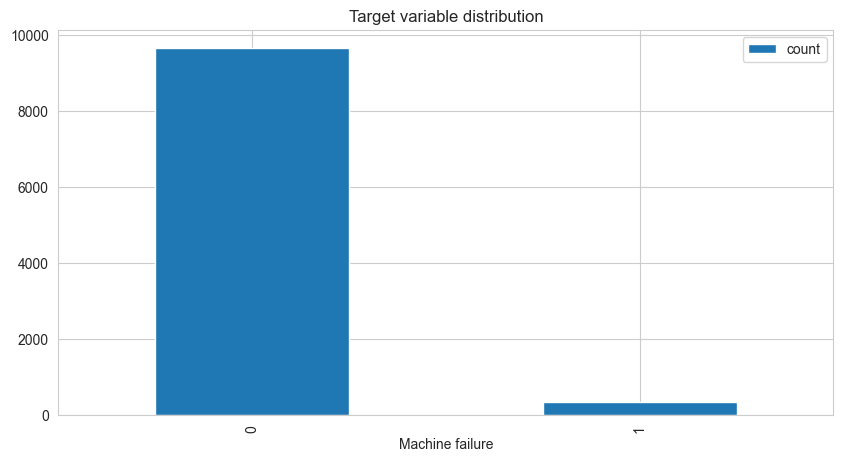

In [12]:
df['Machine failure'].value_counts().reset_index().plot(kind='bar', x='Machine failure', y='count', figsize=(10, 5))
plt.title("Target variable distribution")
plt.show()

# Feature Importance

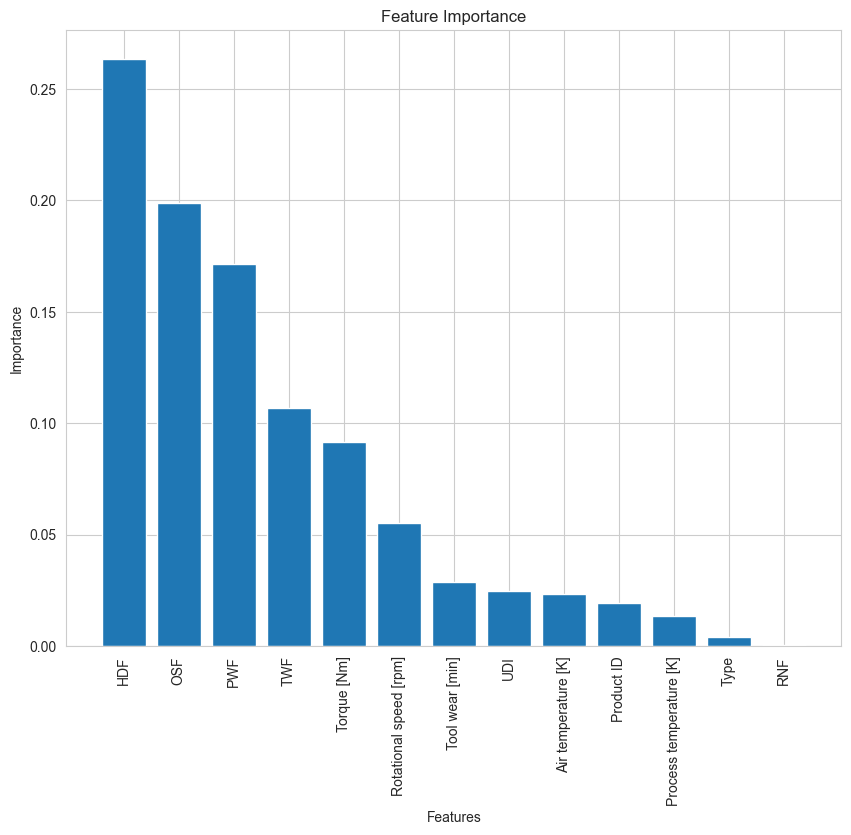

In [13]:
# Pisahkan fitur dan target
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']

# Ubah data kategorikal menjadi numerik jika perlu
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Membagi dataset menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
# Latih model
clf.fit(X_train, y_train)

# Dapatkan feature importance
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = X_train.columns,
                                   columns=['importance']).sort_values('importance', ascending=False)

# Mengurutkan fitur berdasarkan importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Membuat bar chart
plt.figure(figsize=(10, 8))
plt.bar(feature_importances.index, feature_importances['importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90)  # Memutar label pada x-axis agar mudah dibaca
plt.title('Feature Importance')
plt.show()

